# Plotting and Visualization
## DAT540 Introduction to Data Science
## University of Stavanger
### L13.2
#### Antorweep Chakravorty (antorweep.chakravorty@uis.no)

- **Plotting with pandas and seaborn**
- pandas itself has built-in methods that simplify creating visualizations from DataFrames and Series objects
- *seaborn* is an additional statistical graphics library that simplifies creating various common visualization
- It allows aggregation and summarization with plotting


- *Line Plots*
- Series and DataFrame each have a *plot* argument for making some basic plot types.
- By default *plot()* makes line plots

- A Series object's index is passed to matplotlib for plotting on the x-axis. It can be disabled by passing argument *use_index=False* to plot()
- The x-axis ticks and limits can be adjusted with *xticks* and *xlim* options
- The y-axis respectively with *y-ticks* and *y-lim*
- *plot* options/arguments for Series / DataFrames

<img src='./images/series_plot.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:>

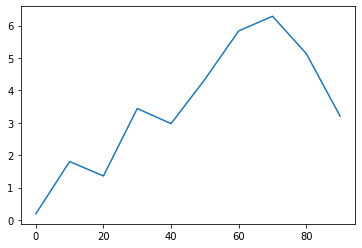

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

- A DataFrame's plot method plots each of its columns as a different line on the same subplot, creating a legend automatically
- Like Series, a DataFrame plot instance creates a line plot by default and is equivalent to *df.plot.line()*
- DataFrame has a number of additional options allowing more flexibility with how the columns are handled
  - e.g. whether to plot them all on same subplot or to create seperate subplots
  
<img src='images/dataframe_plot.png'>

<AxesSubplot:>

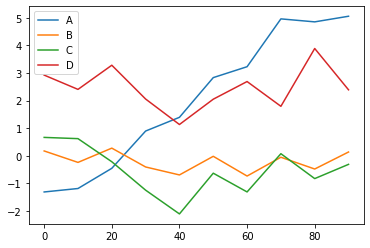

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

- *Bar Plots*
- *plot.bar()* and *plot.barh()* makes vertical and horizontal bar plots
- Series or DataFrame index will be used as the x (bar) or y (barh) ticks
- With DataFrame, bar plots groups the values in each row together in a group in bars, side by side, for each value
- A stacked bar plot can be created by passing stacked=True option to DataFrame plot

<AxesSubplot:>

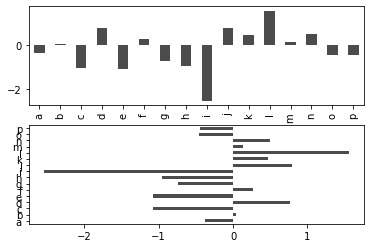

In [4]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [5]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.649813,0.972024,0.906605,0.624211
two,0.454444,0.286989,0.223784,0.538726
three,0.270029,0.042738,0.672252,0.071373
four,0.343080,0.169823,0.001626,0.319548
five,0.101839,0.013683,0.196739,0.770435
six,0.975316,0.360344,0.714119,0.737109


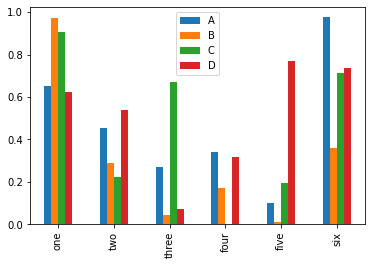

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df.plot.bar(ax=ax)
ax.legend(loc='best')

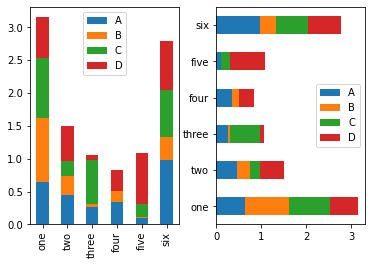

In [7]:
# Creating Stacked bargraphs
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df.plot.bar(ax=ax1, stacked=True)
df.plot.barh(ax=ax2, stacked=True)
ax1.legend(loc='best')
ax2.legend(loc='best')
fig.subplots_adjust(wspace=.25, hspace=0)

In [8]:
titanic = pd.read_csv('./data/titanic.csv',
                      delimiter=',', index_col='PassengerId')
titanic.shape

(891, 11)

In [9]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
titanic.isnull().sum(0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# removing row with having Embarked value as Null. Only two such row present
titanic.dropna(subset=['Embarked'], inplace=True)
# We drop the cabin column as it has a lot of missing data and if we can interpolate it from the Fare or Ticket column, then we dont need it
titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.shape

(889, 10)

In [13]:
titanic['Name'].apply(lambda x: [sal.title() for sal in x.split(' ')] ).apply(lambda x: x[1]).unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'Der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'Y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'The',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [14]:
titanic['Name'].iloc[887]

'Behr, Mr. Karl Howell'

In [15]:
salutations = titanic['Name'].apply(lambda x: [sal.title() for sal in x.split(' ')] ).apply(lambda x: x[1]).unique()
titanic['Salutations'] = titanic['Name'].apply(lambda x: [sal.title() for sal in x.split(' ') if sal.title() in salutations] ).apply(lambda x: x[0] if len(x) == 1 else np.nan)
# We check if for all null ages, we have a salutation
titanic[titanic['Age'].isnull()].isnull().sum(0)

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Salutations      2
dtype: int64

In [16]:
# removing row with having Salutations value as Null. Only two such row present
titanic.dropna(subset=['Salutations'], inplace=True)
titanic.shape

(867, 11)

In [17]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutations
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.


In [18]:
# Get the mean age by salutation
meanAgeBySalutation = dict(titanic.reset_index(drop=True).set_index('Salutations')['Age'].mean(level=0))

# Fill the missing null values for Age
titanic.loc[titanic['Age'].isnull(), 'Age'] = titanic.loc[titanic['Age'].isnull(), 
                                                          'Salutations'].map(lambda x: meanAgeBySalutation.get(x))

titanic.isnull().sum(0)

/var/folders/b5/qtlwb6j979d58ssnfbkgyckc0000gn/T/ipykernel_33749/732873436.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  meanAgeBySalutation = dict(titanic.reset_index(drop=True).set_index('Salutations')['Age'].mean(level=0))


Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Salutations    0
dtype: int64

In [19]:
# We drop the Salutations, we donot need it now
titanic.drop(['Salutations'], axis=1, inplace=True)
titanic.isnull().sum(0)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Survived'>

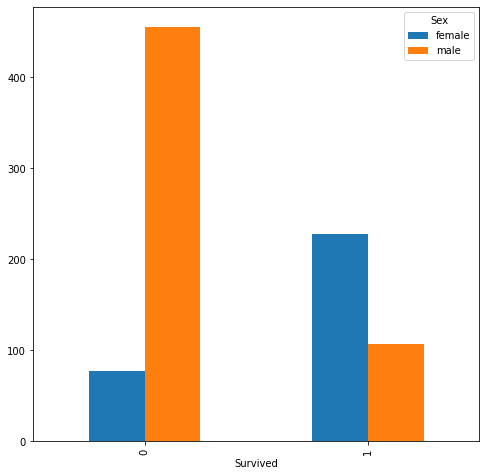

In [20]:
# Visualizing the relation between Sex and Survived. Do we see any relevence
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
pd.crosstab(titanic['Survived'], titanic['Sex']).plot.bar(ax=ax)

- In exploratory data analysis scatter pair plots describes relationships among group of variables (a.k.a. *pairs* plot or *scatter plot matrix*). 
- *seaborn* has a convenient *pairplot* function, which supports histograms or density estimates of each variable along the diagonal
- *heatmap* top-level method of seaborn plots rectangular data as a color-encoded matrix.

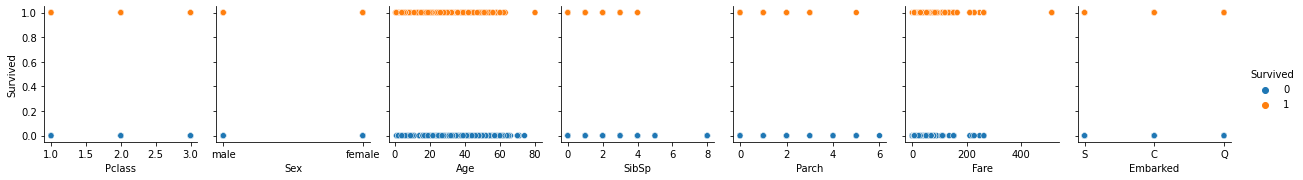

In [21]:
sbn.pairplot(data=titanic, 
              x_vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
              y_vars=['Survived'],
            hue='Survived')

<AxesSubplot:>

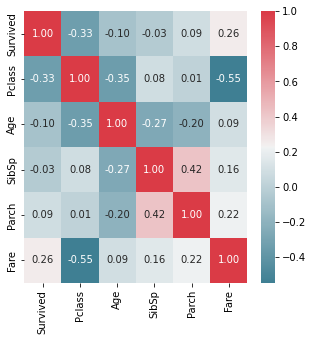

In [22]:
# Lets see the correlations
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
corr = titanic.corr()
#Generate Color Map, red & blue
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)

In [23]:
# Pclass vs Survived. Since we have limited number of unique values for Pclass, we can represent it in a barplot
titanic['Pclass'].unique().shape

(3,)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

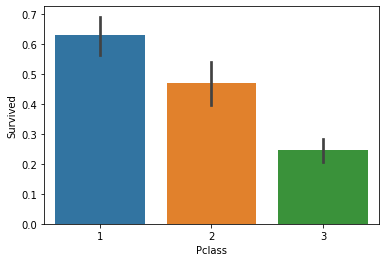

In [24]:
sbn.barplot(data=titanic, x='Pclass', y='Survived')

In [25]:
# Age vs Survived. Since we have a lot number of unique values for Age, we can represent it in density bins
titanic['Age'].unique().shape

(92,)

<AxesSubplot:ylabel='Frequency'>

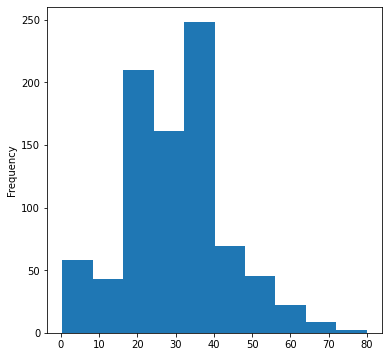

In [26]:
# First we look at the age data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
titanic['Age'].plot.hist(ax=ax)

/Users/antorweep/Documents/dev/uis/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/antorweep/Documents/dev/uis/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


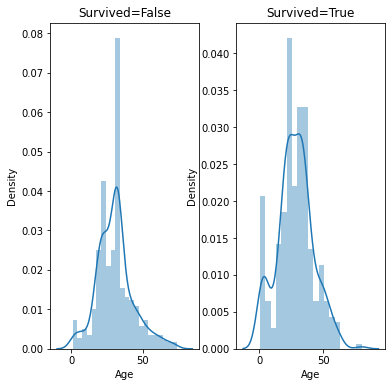

In [27]:
# Overall age have very less relationship with surviving. 
# However, it might be that chucks of age have better possibility to survive than others
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sbn.distplot(titanic['Age'][titanic['Survived'] == 0], ax=ax1)
sbn.distplot(titanic['Age'][titanic['Survived'] == 1], ax=ax2)
fig.subplots_adjust(wspace=.25, hspace=0)
_ = ax1.set_title('Survived=False')
_ = ax2.set_title('Survived=True')

<AxesSubplot:xlabel='Age', ylabel='Density'>

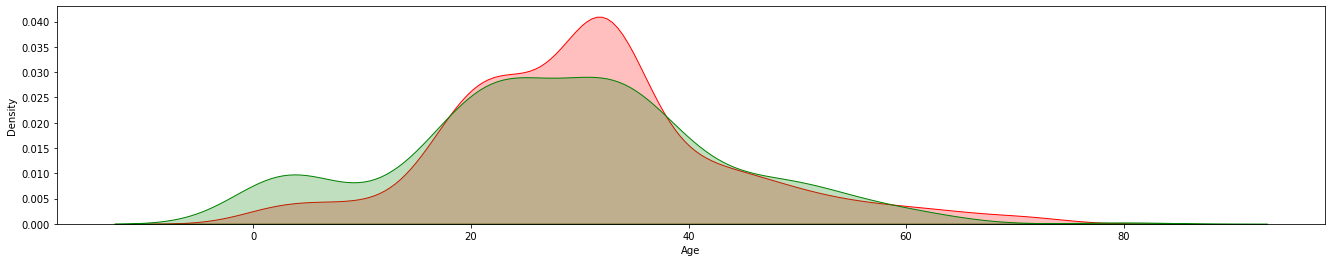

In [28]:
# We observe that age betweeen 0-5 has a peek and survives more often than not
fig = plt.figure(figsize=(50,4))
ax = fig.add_subplot(1, 2, 1)
sbn.kdeplot(titanic['Age'][titanic['Survived'] == 0], color='red', shade=True, ax=ax)
sbn.kdeplot(titanic['Age'][titanic['Survived'] == 1], color='green', shade=True, ax=ax)

In [29]:
# SibSp vs Survived. Since we have limited number of unique values for SibSp, we can represent it in a barplot
titanic['SibSp'].unique().shape

(7,)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

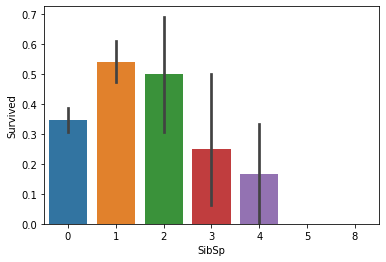

In [30]:
# SibSp vs Survived
# Single or people having one or two siblings have better chance to survive
sbn.barplot(data=titanic, x='SibSp', y='Survived')

In [31]:
# Parch vs Survived. Since we have limited number of unique values for Parch, we can represent it in a barplot
titanic['Parch'].unique().shape

(7,)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

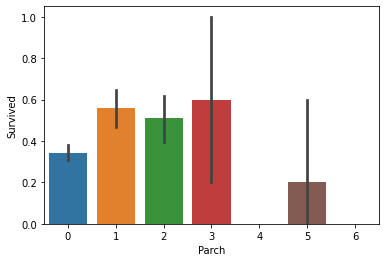

In [32]:
# Parch vs Survived
# People in Parch 1 - 3 have better chance to survive
sbn.barplot(data=titanic, x='Parch', y='Survived')

In [33]:
# Fare vs Survived. Since we have a lot number of unique values for Fare, we can represent it in  bins
# This will help us identify, which chunks of fares actually have some relationship to survive
titanic['Fare'].unique().shape

(241,)

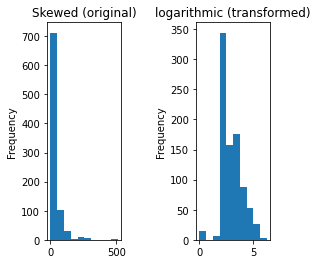

In [34]:
# First we look at the fare data. It is skewed, so we transform it
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
titanic['Fare'].plot.hist(ax=ax1)
titanic['Fare'] = titanic['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
titanic['Fare'].plot.hist(ax=ax2)
_ = ax1.set_title('Skewed (original)')
_ = ax2.set_title('logarithmic (transformed)')
fig.subplots_adjust(wspace=1, hspace=0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

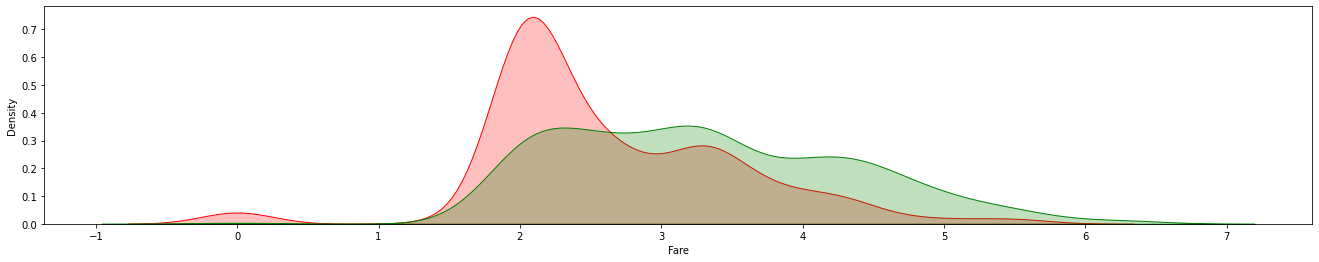

In [35]:
# We observe that fare between 3-6 have slightly better chance to survive. But overall they all have high corr.
fig = plt.figure(figsize=(50,4))
ax = fig.add_subplot(1, 2, 1)
sbn.kdeplot(titanic['Fare'][titanic['Survived'] == 0], color='red', shade=True, ax=ax)
sbn.kdeplot(titanic['Fare'][titanic['Survived'] == 1], color='green', shade=True, ax=ax)

In [36]:
# Embarked vs Survived. Since we have limited number of unique values for Embarked, we can represent it in a barplot
titanic['Embarked'].unique().shape

(3,)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

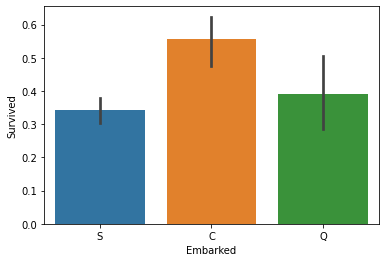

In [37]:
# Embarked vs Survived
# People who Embarked at C have better chance, can people from that port C swim better?
sbn.barplot(data=titanic, x='Embarked', y='Survived')

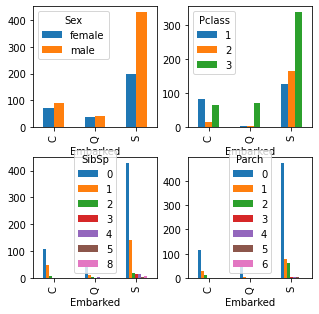

In [38]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# We know that female have better chance of surviving than man
pd.crosstab(titanic['Embarked'], titanic['Sex']).plot.bar(ax=ax1) 
# We know that chance of surviving in class 1> 2> 3
pd.crosstab(titanic['Embarked'], titanic['Pclass']).plot.bar(ax=ax2)
# We know that people with 0 - 2 siblings slightly have better chance of surviving
pd.crosstab(titanic['Embarked'], titanic['SibSp']).plot.bar(ax=ax3)
# We know that people in Parch 1 - 3 have better chance of surviving
pd.crosstab(titanic['Embarked'], titanic['Parch']).plot.bar(ax=ax4)
fig.subplots_adjust(wspace=.25, hspace=.25)

In [39]:
# Let us create bins for age as AgeBins
# Age has a min of 0 and max of 80
titanic['AgeBins'] = pd.cut(titanic['Age'], range(0, 85, 5), right=True)

# We create dummies and bins. Why?
titanic = pd.concat([titanic, 
                     pd.get_dummies(titanic['Sex'], prefix='sex_'), 
                     pd.get_dummies(titanic['AgeBins'], prefix='age_'), 
                     pd.get_dummies(titanic['Embarked'], prefix='emb_'),
                     pd.get_dummies(titanic['Pclass'], prefix='pcl_'),
                     pd.get_dummies(titanic['SibSp'], prefix='sib_'),
                     pd.get_dummies(titanic['Parch'], prefix='par_')], axis=1)

In [40]:
titanic.shape

(867, 49)

<AxesSubplot:>

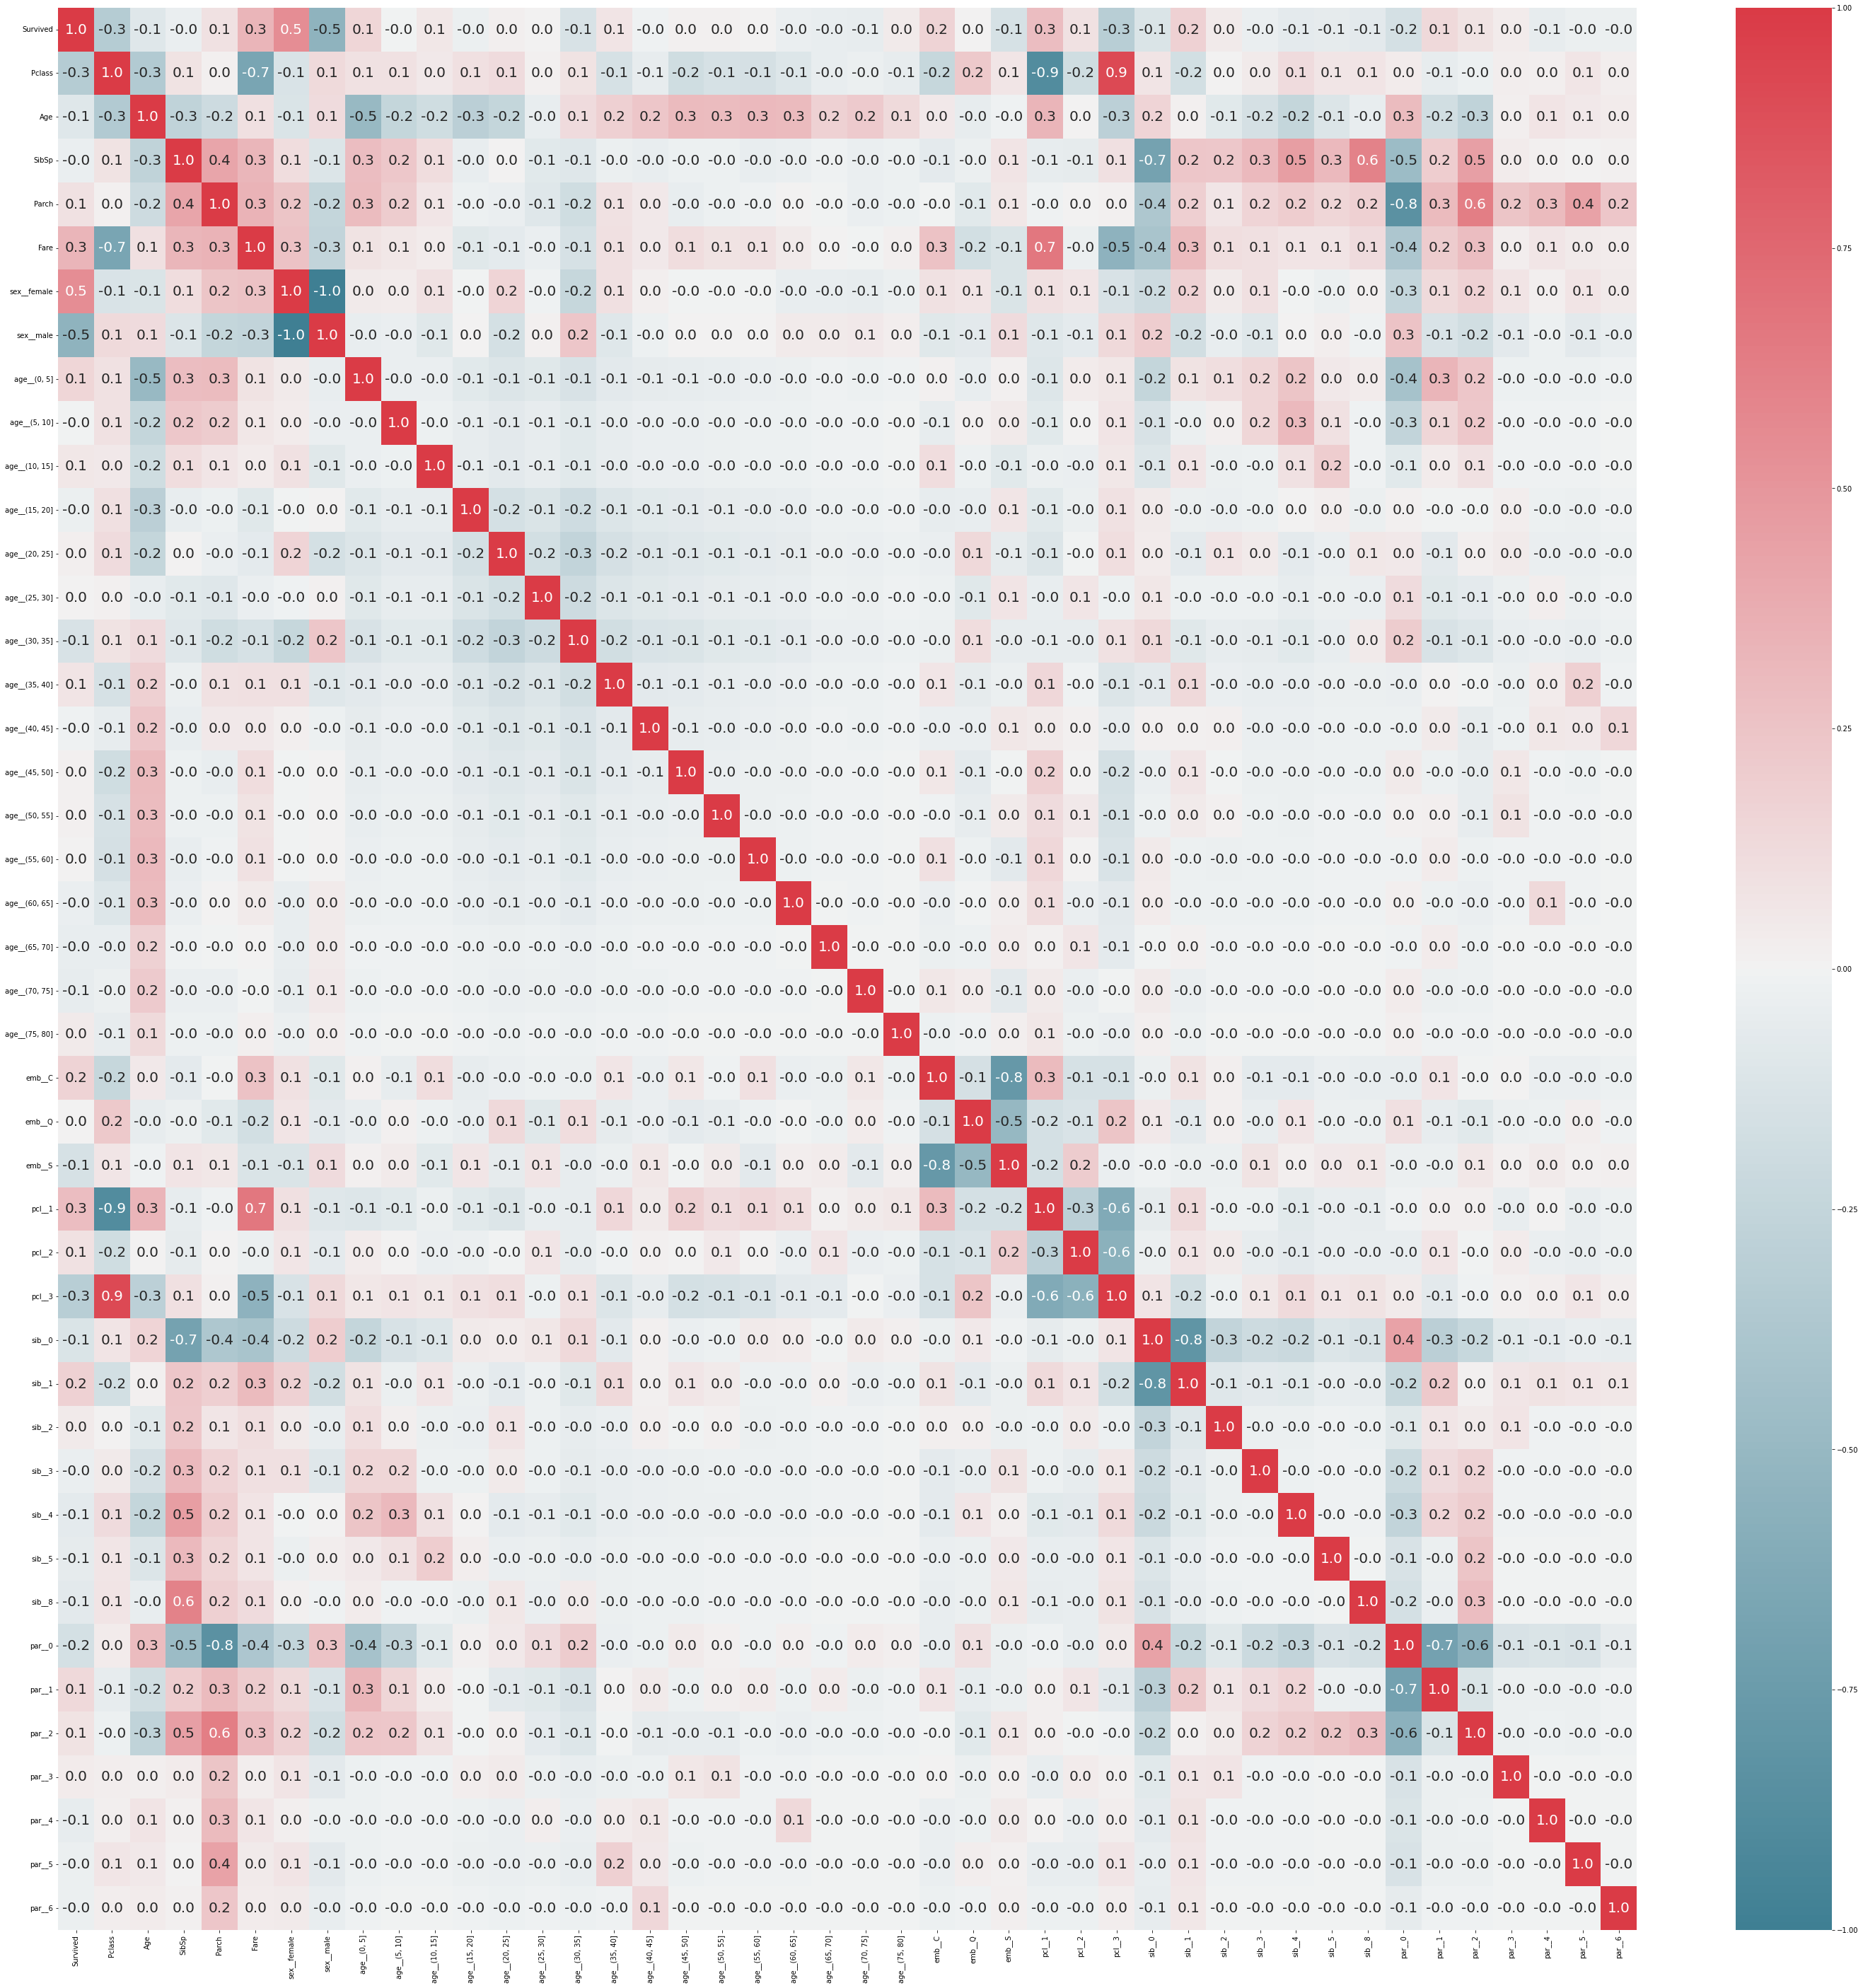

In [41]:
# Lets see the correlations again
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1,1,1)
corr = titanic.corr()
#Generate Color Map, red & blue
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".1f", ax=ax, annot_kws={"size": 20})

In [42]:
# We choose the high correlated variables
threshold = 0.2
titanic_trans = titanic[np.append(corr['Survived'][1:][corr['Survived'][1:].map(lambda x: np.abs(x) > threshold)].index.values, ['Survived'])]
titanic_trans.head()

,Pclass,Fare,sex__female,sex__male,pcl__1,pcl__3,Survived
PassengerId,,,,,,,
1,3,1.981001,0,1,0,1,0
2,1,4.266662,1,0,1,0,1
3,3,2.070022,1,0,0,1,1
4,1,3.972177,1,0,1,0,1
5,3,2.085672,0,1,0,1,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as MAPE

In [48]:
# We take 80% of the dataset to train and rest to test
# there are further optimization that can be performed on the data. This is just an initial example
test = titanic_trans.sample(frac=.2)
train = titanic_trans[~titanic_trans.isin(test).all(1)]

In [51]:
predictions = pd.DataFrame([])
model = LogisticRegression()
model.fit(train.loc[:, train.columns != 'Survived'], train['Survived'])
predictions['Survived'] = np.ceil(model.predict(test.loc[:, test.columns != 'Survived']))
predictions['PassengerId'] = test.index.values
predictions.set_index('PassengerId', inplace=True)
# since we are doing random sampling in choosing the train and test set, expect different MAPE across multiple runs
print('Accuracy:',  (1 - MAPE(test['Survived'], predictions['Survived'])) * 100) 

Accuracy: 78.03468208092485


<AxesSubplot:xlabel='PassengerId', ylabel='Survived_pred'>

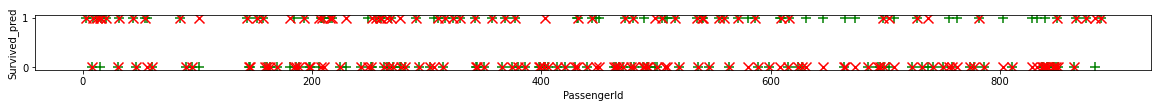

In [46]:
%matplotlib inline
fig = plt.figure(figsize=(20,1))
ax = fig.add_subplot(1,1,1)
result = test[['Survived']].join(predictions, rsuffix='_pred').reset_index()
result.plot.scatter(ax=ax, x='PassengerId', y='Survived', color='green', marker='+', s=100)
result.plot.scatter(ax=ax, x='PassengerId', y='Survived_pred', color='red', marker='x', s=100)

##### Read more about improving the titanic survival dataset https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
##### More about Seaborn https://seaborn.pydata.org/